# Assignment 01

Joel Brigida

CAP4613-001 Intro to Deep Learning

Prof. Behnaz Ghoraani

Due Date: Jan 23, 2022

In [1]:
# Import visualization libraries:

from ast import literal_eval # Convert string input to tuple
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem #1
---

### 1a) Scatter Plot of a List

In [2]:
# declare a list of points for the scatter plot
samples = [(0,0), (0,1), (1,0), (1,1)]

# print(samples[1]) # debug
# print(type(samples[1])) # debug
# print(type(samples)) # debug

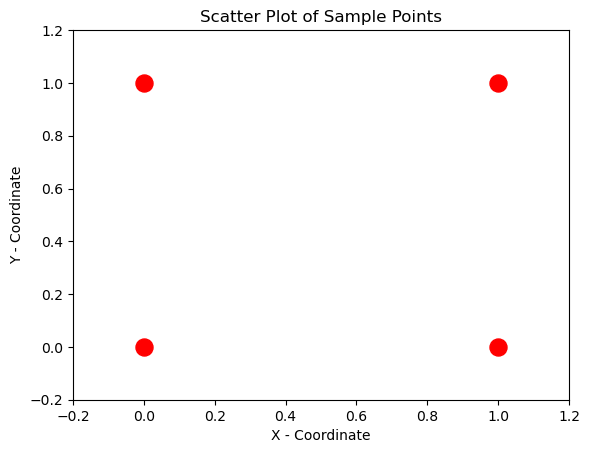

In [3]:
def scatterPlot(anyList):
  plt.figure()
  
  plt.scatter(*zip(*anyList), color = 'red', s = 150)
  plt.xlabel('X - Coordinate')
  plt.ylabel('Y - Coordinate')
  plt.title('Scatter Plot of Sample Points')
  plt.xlim(-0.2, 1.2)
  plt.ylim(-0.2, 1.2)

  plt.show()

scatterPlot(samples) # function call

### 1b) Function to perform logic AND

In [4]:
# define a function using conditional statements 
# do not use the built-in AND function

def logic_and(x, y):
  if(x == 0 and y == 0):
    return 0
  elif(x == 0 and y == 1):
    return 0
  elif(x == 1 and y == 0):
    return 0
  elif(x == 1 and y == 1):
    return 1
  else:
    print("INPUT ERROR (AND)")

### 1c) Functions to perform logic OR and XOR

In [5]:
# Logic OR function using only conditionals

def logic_or(x, y):
  if(x == 0 and y == 0):
    return 0
  elif(x == 0 and y == 1):
    return 1
  elif(x == 1 and y == 0):
    return 1
  elif(x == 1 and y == 1):
    return 1
  else:
    print("INPUT ERROR (OR)")

In [6]:
# logic XOR function using only conditionals

def logic_xor(x, y):
  if(x == 0 and y == 0):
    return 0
  elif(x == 0 and y == 1):
    return 1
  elif(x == 1 and y == 0):
    return 1
  elif(x == 1 and y == 1):
    return 0
  else:
    print("INPUT ERROR (XOR)")

### 1d) Create a for loop to call each function for sample data

### 1e) Store each output in a separate list

### 1f) Print results for each function at end of program

In [7]:
# Reference: https://www.geeksforgeeks.org/tuple-as-function-arguments-in-python/

and_result = []
or_result = []
xor_result = []

for item in samples:
  #print(item) # debug
  #print(type(item)) # debug (tuple type)
  output_and = logic_and(*(item))
  #print(output_and) # debug
  and_result.append(output_and)

  output_or = logic_or(*(item))
  or_result.append(output_or)

  output_xor = logic_xor(*(item))
  xor_result.append(output_xor)

print(f'Original Sample Dataset: {samples}\n')
print(f'Results for Logic AND: {and_result}\n')
print(f'Results for Logic OR: {or_result}\n')
print(f'Results for Logic XOR: {xor_result}\n')

Original Sample Dataset: [(0, 0), (0, 1), (1, 0), (1, 1)]

Results for Logic AND: [0, 0, 0, 1]

Results for Logic OR: [0, 1, 1, 1]

Results for Logic XOR: [0, 1, 1, 0]



## Problem #2
---

### 2a) Plot data samples of both classes, label axes and add legend.

### 2b) Prompt user input for $th_x$ and $th_y$.

### 2c) Implement error checking for input.

### 2d) Print training accuracy based on user entered thresholds:
- for $(x, y)$ with $x \ge th_x$ and $y \ge th_y$:<br><br>
  - The data sample belongs to Class C1, and C2 otherwise.<br><br>
- calculate the classification accuracy for the six data samples:<br><br>
  - $\mathrm{Classification \ Accuracy = \frac{Correctly \ Classified \ Data \ Points}{Total \ Number \ of \ Data \ Points}}$

### 2e) Plot data samples, $th_x$ and $th_y$ lines

### 2f) Create a loop to repeat parts d) and e)

### 2g) Entering 'x' shall exit/terminate the loop

In [8]:
def checkInput(valToCheck):
    try:
        newVal = float(valToCheck) # Check if user enters a number
        #print(f'1st Try: newVal = "{newVal}"') # debug statements
        #print("Returning newVal")
        return newVal
    except ValueError: # if its not a number
        #print("1st Except: ")
        try:
            newVal = str(valToCheck) # check if user enters a string
            #print(f'2nd Try: newVal = "{newVal}"')
            if(newVal == 'x' or newVal == 'X'):
                #print("Returning kill")
                return 'kill'
            else:
                #print("Returning retry")
                return 'retry'
        except ValueError:
            #print("2nd Except: Invalid Entry: Enter an integer, float, or x to exit")
            return 'retry'

In [9]:
def calcAccuracy(thx, thy, Class1, Class2):

    plotClass1 = 0 # of correct classifications for Red Squares (Class 1)
    plotClass2 = 0 # of correct classifications for Blue Triangle (Class 2)

    for x, y in Class1: # classify Class 1
        #print(x, y)
        if(x >= thx and y >= thy):
            plotClass1 += 1
            
    print()

    for x, y in Class2: # classify Class 2
        #print(x, y)
        if(x < thx or y < thy):
            plotClass2 += 1

    #print(plotClass1)
    #print(plotClass2, '\n')

    #print(len(Class1))
    #print(len(Class2),'\n')

    corrClass1 = ((plotClass1 / len(Class1)) * 100) # % of correct classified / total in class
    corrClass2 = ((plotClass2 / len(Class2)) * 100) # % of correct classified / total in class

    print('Classification Accuracy for Class C1: %.2f' % corrClass1, '%')
    print('Classification Accuracy for Class C2: %.2f' % corrClass2, '%')

    # calculate % of correctly classified data points
    overallAccuracy = (((plotClass1 + plotClass2) / (len(Class1) + len(Class2))) * 100)
    print('Overall Accuracy for both Classes: %.2f' % overallAccuracy, '%')

In [10]:
# Declare 2 sets of data points

C1 = {(2, 3), (3, 3), (3, 4), (1, 4), (4, 1), (4, 3)}
C2 = {(0, 0), (0, 3), (1, 1), (1, 2), (2, 1), (2, 2)}
# print(type(C1), type(C2)) # debug (set type)

def plot(th_x, th_y):
    # Plot data as a scatter plot:
    plt.figure(figsize = (10, 6))

    plt.scatter(*zip(*C1), color = 'red', s = 150, marker = ',')
    plt.scatter(*zip(*C2), color = 'blue', s = 150, marker = '^')
    plt.vlines(x = th_x, ymin = th_y, ymax = 5, color='orange', linestyle='--')
    plt.hlines(y = th_y, xmin = th_x, xmax = 5, color='g', linestyle='--')
    plt.xlabel('X - Threshold', fontsize = 14)
    plt.ylabel('Y - Threshold', fontsize = 14)
    #plt.text((th_x - 0.3), (th_y - 0.3), '(' + str(th_x) + ', ' + str(th_y) + ')', color='r', fontsize=12)
    plt.text((th_x - 0.3), (th_y - 0.3), f'({th_x}, {th_y})', color='r', fontsize=12) # alternate way
    plt.title('Scatter Plot of Sample Points', fontsize = 18)
    plt.xlim(-1, 5)
    plt.ylim(-1, 5)
    plt.legend(['Class 1', 'Class 2', 'th_x', 'th_y'], fontsize = 11, loc='upper right')

    plt.show()
    calcAccuracy(th_x, th_y, C1, C2) # Calculate accuracy


In [11]:
def thresholdEntry():
    while True:
        print("Enter an X-threshold th_x: ")
        x = input()
        th_x = checkInput(x) # function call to check input
        if(th_x == 'retry'):
            print("Invalid Input...Start Over")
            continue
        elif(th_x == 'kill'):
            print("Exiting Function...")
            return

        print("Enter a Y-threshold th_y: ")
        y = input()
        th_y = checkInput(y) # function call to check input
        if(th_y == 'retry'):
            print("Invalid Input...Start Over")
            continue
        elif(th_y == 'kill'):
            print("Exiting Function...")
            return
        
        th_x1 = float(th_x)
        th_y1 = float(th_y)
        #print(f'th_x1 = {th_x1}, th_y1 = {th_y1}') # debug statements
        #print(isinstance(th_x1, float))
        #print(isinstance(th_y1, float))
        
        if(isinstance(th_x1, float) and isinstance(th_y1, float)):
            plot(th_x1, th_y1) # Function call to plot the graph
            continue
        else:
            print('Exiting Function...')
        return

## Run The Program:

Enter an X-threshold th_x: 
Enter a Y-threshold th_y: 


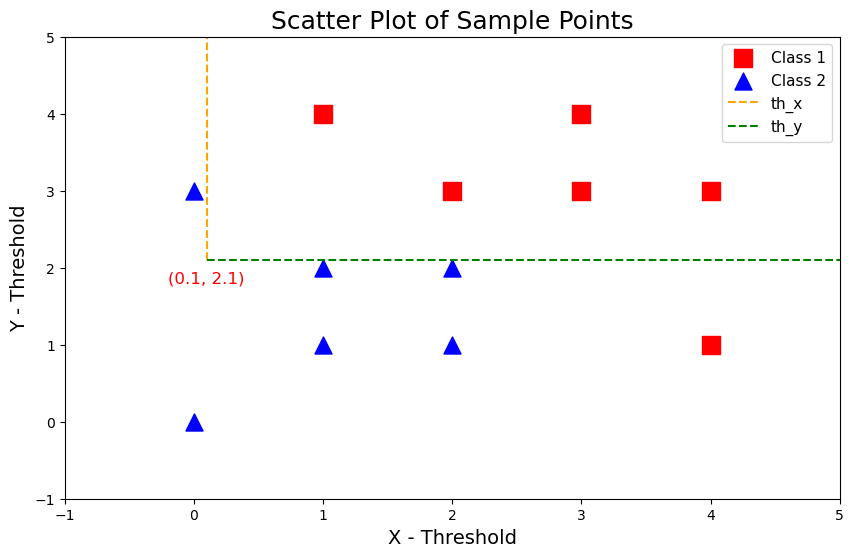


Classification Accuracy for Class C1: 83.33 %
Classification Accuracy for Class C2: 100.00 %
Overall Accuracy for both Classes: 91.67 %
Enter an X-threshold th_x: 
Enter a Y-threshold th_y: 


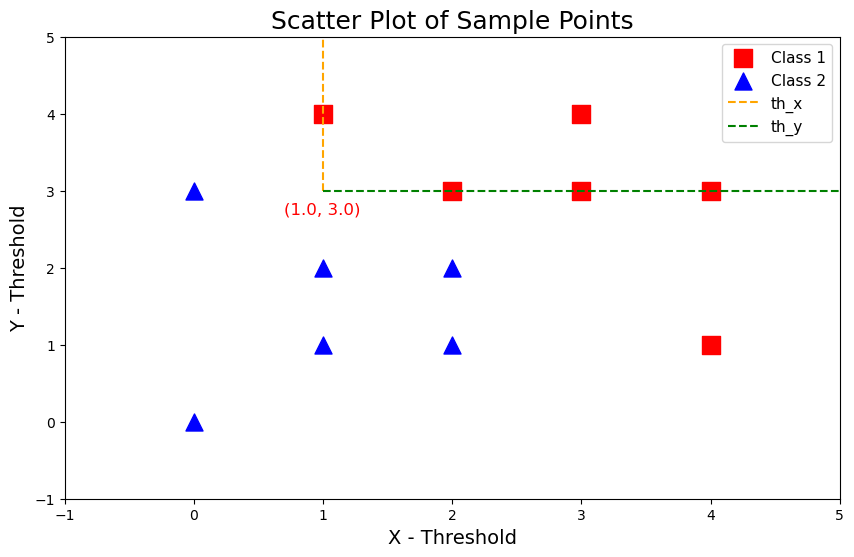


Classification Accuracy for Class C1: 83.33 %
Classification Accuracy for Class C2: 100.00 %
Overall Accuracy for both Classes: 91.67 %
Enter an X-threshold th_x: 
Invalid Input...Start Over
Enter an X-threshold th_x: 
Exiting Function...


In [12]:
# Run Program

thresholdEntry()

## Problem 2h: 

"Based on your observation from the results above, what is a suitable set of thresholds that will give the highest accuracy? Report your suggested thresholds and the corresponding classification accuracy."

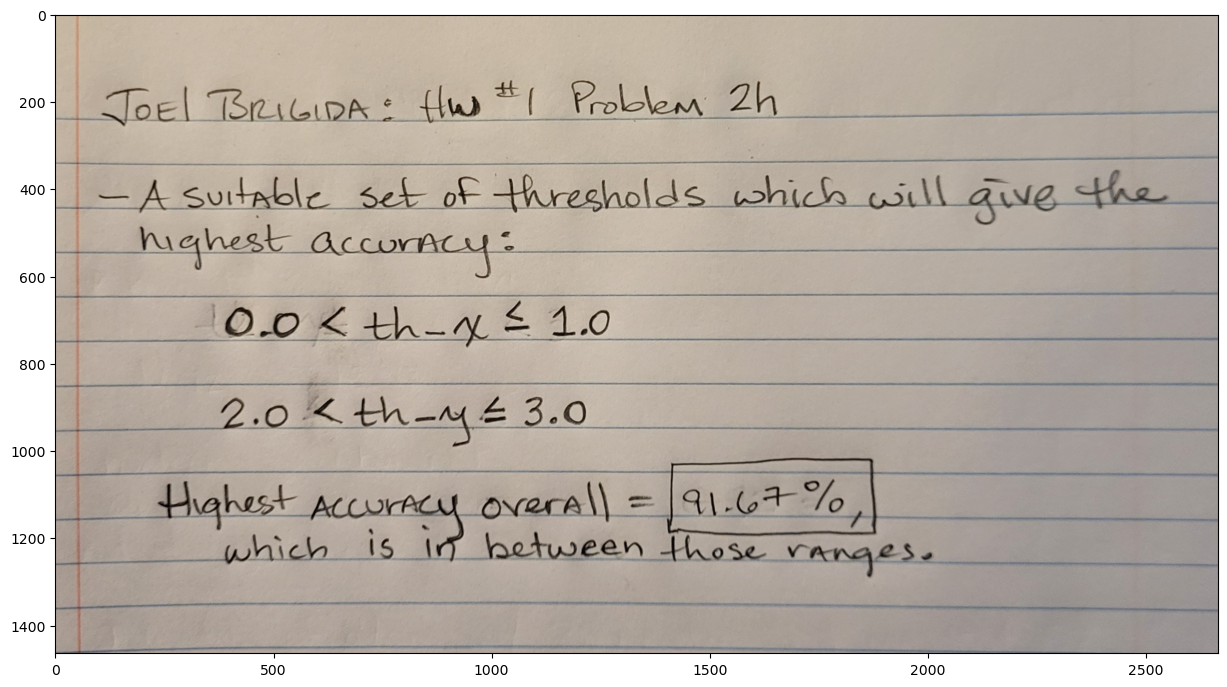

In [13]:
import matplotlib.image as img
  
# reading the image
myImage = img.imread('../assets/HW1/HW1-2h.jpg')

plt.figure(figsize = (15, 15))
plt.imshow(myImage)
plt.show()